In [1]:
import os
import csv

import pandas as pd

import matplotlib
matplotlib.use('nbagg')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [2]:
data_folder = "/Users/WillC/Documents/Rutgers/3rd_Year/Spring_Semester/intro-data-science/neolithic_prediction_modeling/data/EUROEVOL_Dataset"
data_file = "EUROEVOL09-07-201516-34_CommonSites.csv"
commonsites = os.path.join(data_folder, data_file)

df = pd.read_csv(commonsites, sep=',', error_bad_lines=False)
df.head(10)

Skipping line 2378: expected 5 fields, saw 6
Skipping line 4392: expected 5 fields, saw 9



,Country,Latitude,Longitude,SiteID,SiteName
0,France,47.5100,6.80000,S1000,Pierre Folle
1,France,48.2300,0.16000,S1001,A 28 Nord
2,France,48.2300,0.16000,S1002,A 28
3,Germany,50.7886,6.07437,S1003,"Aachen, Lousberg"
4,Netherlands,51.4200,5.29000,S1004,Aardhorst-Vessem
5,Sweden,55.4000,13.60000,S1007,Abbekås
6,Great Britain,51.9691,-5.08230,S1010,Abermawr I
7,Great Britain,51.6800,-1.26130,S1011,Abingdon
8,France,46.6300,0.59000,S1012,Abri de Bellefonds
9,Belgium,50.2500,4.90000,S1014,Abri des Autours


In [16]:
country = 'Great Britain'

# 
country_df = df.where(df['Country'] == country)
country_df = country_df.where(df['Latitude'] <= 60.)
country_df = country_df.dropna()
print '%s has %d sites'% (country, country_df['Country'].count())

# set min and max latitude and longitude
minlat = country_df['Latitude'].min()
maxlat = country_df['Latitude'].max()
minlon = country_df['Longitude'].min()
maxlon = country_df['Longitude'].max()

difflat = maxlat - minlat
minlat -= (difflat / 10)
maxlat += (difflat / 10)
difflon = maxlon - minlon
minlon -= (difflon / 10)
maxlon += (difflon / 10)

print 'latitude  range : [%10.5f, %10.5f]' % (minlat, maxlat)
print 'longitude range : [%10.5f, %10.5f]' % (minlon, maxlon)

Great Britain has 954 sites
latitude  range : [  48.23853,   60.35937]
longitude range : [  -9.57296,    2.46894]


<IPython.core.display.Javascript object>


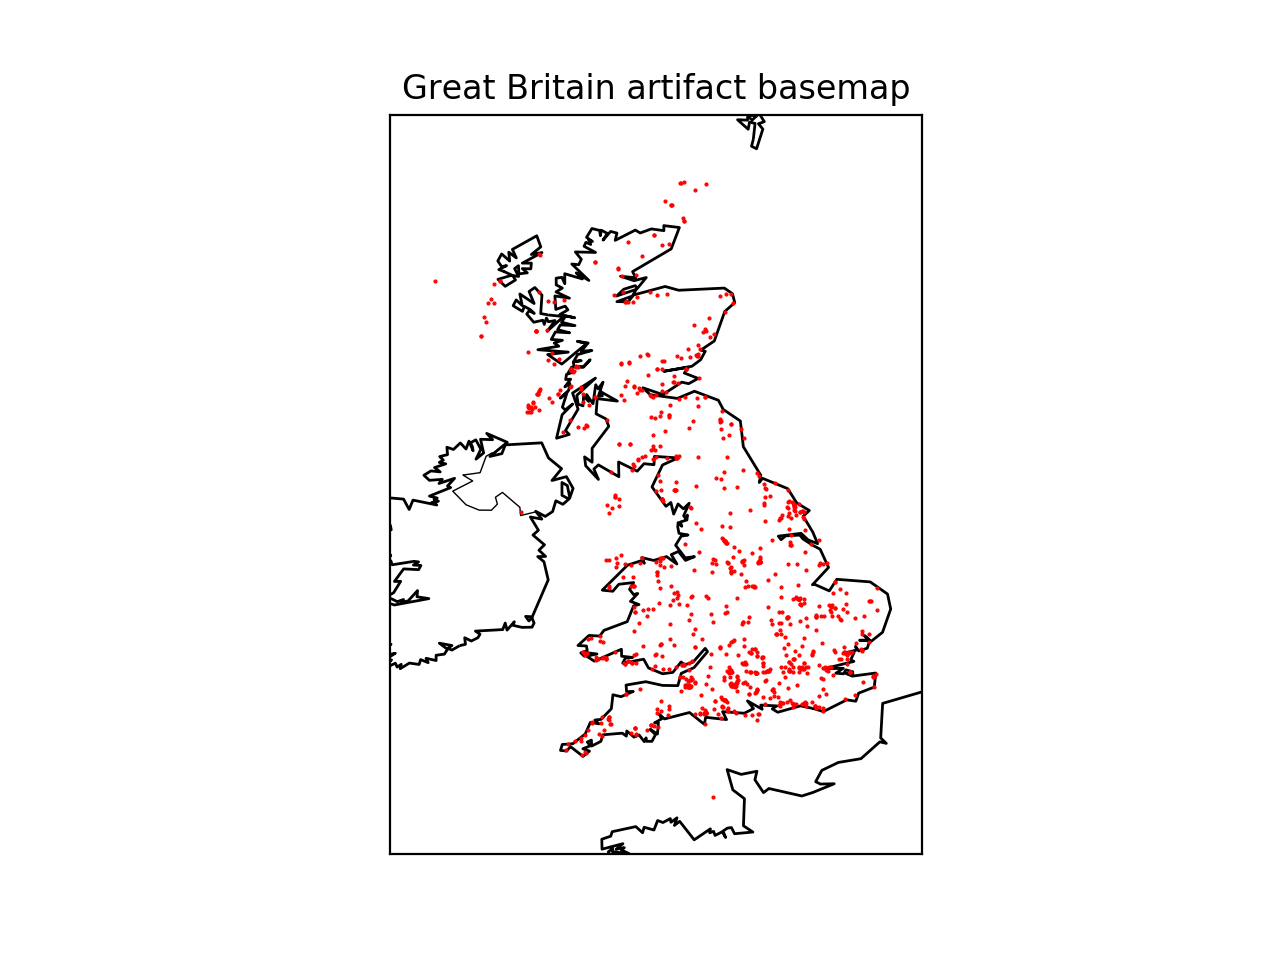

In [6]:
m = Basemap(projection='mill',
            llcrnrlat=minlat,urcrnrlat=maxlat,     
            llcrnrlon=minlon,urcrnrlon=maxlon,resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.drawrivers()
# m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
# m.drawmapboundary(fill_color='#FFFFFF')
# m.bluemarble()

lat = country_df['Latitude'].tolist()
lon = country_df['Longitude'].tolist()

x, y = m(lon, lat)
m.plot(x, y, 'r.', markersize=1)

plt.title('%s artifact basemap' % country)
plt.show()

In [20]:
country_df.head(30)

,Country,Latitude,Longitude,SiteID,SiteName
6,Great Britain,51.9691,-5.08230,S1010,Abermawr I
7,Great Britain,51.6800,-1.26130,S1011,Abingdon
20,Great Britain,50.9969,-0.87980,S1040,adjacent to barrows excavated 1973-5
38,Great Britain,56.9485,-7.52410,S1072,Alt Chrysal
41,Great Britain,52.5563,-0.29020,S1075,Alton Longville
46,Great Britain,57.6368,-6.20420,S1081,An Corran
52,Great Britain,54.1014,-6.61730,S1087,Annaghmare
54,Great Britain,53.3446,-1.20530,S1089,Anston Stones Cave
55,Great Britain,51.4899,-0.23540,S1090,Hammersmith
56,Great Britain,51.5011,-0.15130,S1091,Antler mattock series
